# Question 4


## Part (a)

In [1]:
import cv2
import numpy as np  
import matplotlib.pyplot as plt


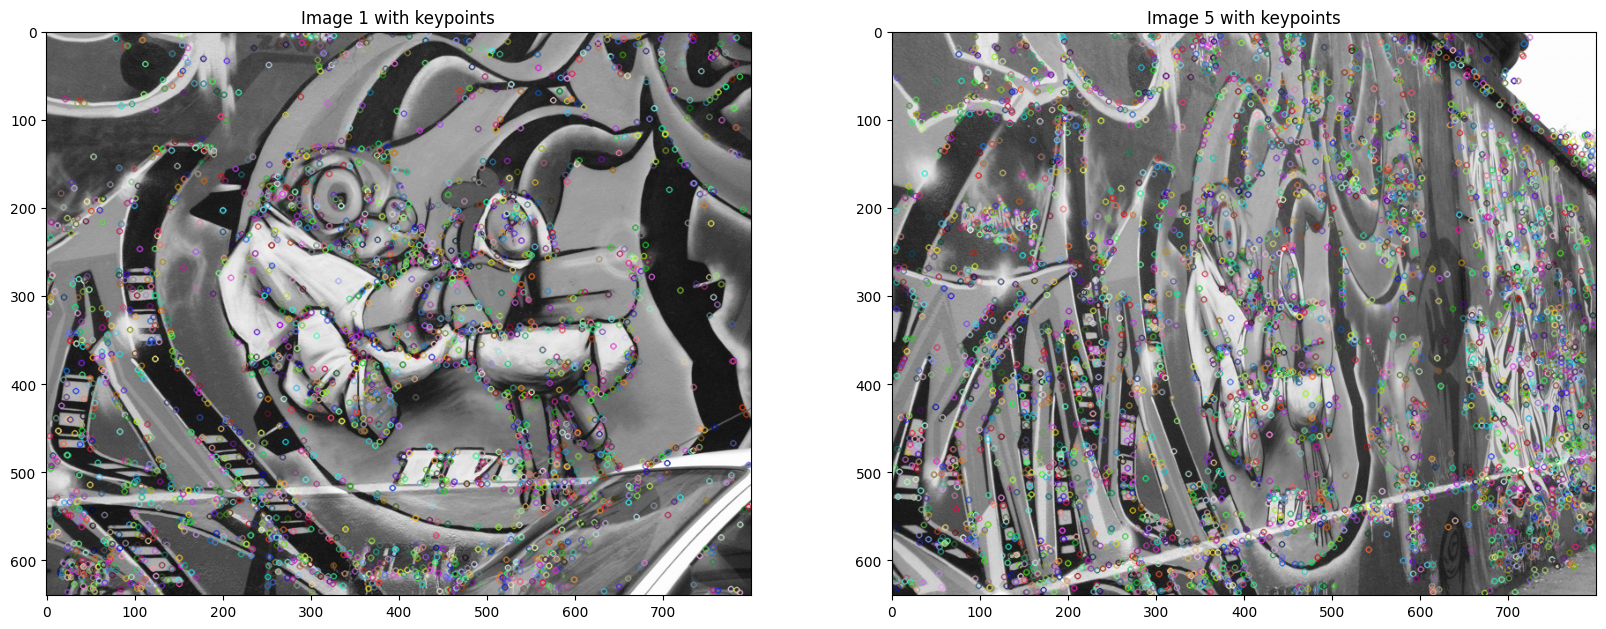

In [2]:
# Load Images
img1 = cv2.imread(r'W:\University of Moratuwa\Academics\Semester 5\EN3160 - Image Processing and Machine Vision\Assignments\Assignment_2\graf\img1.ppm')
img5 = cv2.imread(r'W:\University of Moratuwa\Academics\Semester 5\EN3160 - Image Processing and Machine Vision\Assignments\Assignment_2\graf\img5.ppm')

# Convert to Grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints5, descriptors5 = sift.detectAndCompute(gray5, None)

# Draw keypoints
img1_with_keypoints = cv2.drawKeypoints(gray1, keypoints1, img1)
img5_with_keypoints = cv2.drawKeypoints(gray5, keypoints5, img5)

# Show Images
#cv2.imshow('Image 1 Keypoints', img1_with_keypoints)
#cv2.imshow('Image 5 Keypoints', img5_with_keypoints)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Show Images
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(img1_with_keypoints)
plt.title('Image 1 with keypoints')

plt.subplot(1, 2, 2)
plt.imshow(img5_with_keypoints)
plt.title('Image 5 with keypoints')

plt.show()



## Part (b)

In [3]:
# Custom function to compute the homography matrix using RANSAC 
def compute_homography_RANSAC(matches, keypoints1, keypoints2, num_iterations=1000, threshold=4.0):
    best_homography = None
    best_inliers = []
    
    for _ in range(num_iterations):
        # Randomly select 4 correspondences
        sample_indices = np.random.choice(len(matches), 4, replace=False)
        src_points = np.float32([keypoints1[matches[i].queryIdx].pt for i in sample_indices])
        dst_points = np.float32([keypoints2[matches[i].trainIdx].pt for i in sample_indices])
        
        # Compute the homography using the selected correspondences
        homography, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, threshold)
        
        # Calculate the number of inliers
        inliers = []
        for i, match in enumerate(matches):
            src_pt = keypoints1[match.queryIdx].pt
            dst_pt = keypoints2[match.trainIdx].pt
            src_pt_hom = np.array([src_pt[0], src_pt[1], 1.0])
            projected_pt = np.dot(homography, src_pt_hom)
            projected_pt /= projected_pt[2]
            error = np.linalg.norm(np.array([dst_pt[0], dst_pt[1], 1.0]) - projected_pt)
            if error < threshold:
                inliers.append(i)
        
        # Keep the homography with the most inliers
        if len(inliers) > len(best_inliers):
            best_homography = homography
            best_inliers = inliers

    return best_homography, best_inliers

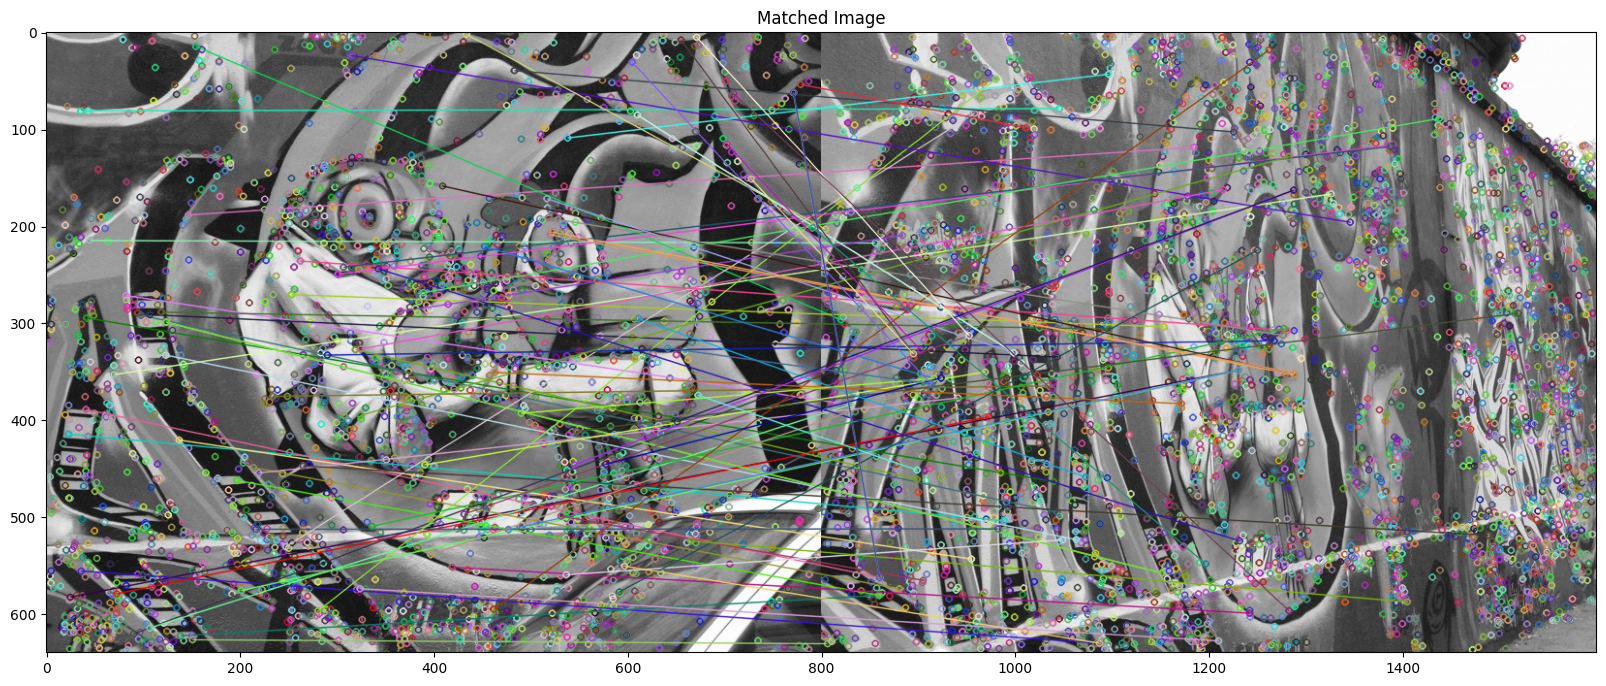

(< cv2.KeyPoint 00000290257BB1E0>, < cv2.KeyPoint 00000290257BBE40>, < cv2.KeyPoint 00000290257BBD80>, < cv2.KeyPoint 0000029035183FC0>, < cv2.KeyPoint 0000029035183A80>, < cv2.KeyPoint 0000029035183AB0>, < cv2.KeyPoint 0000029035183B10>, < cv2.KeyPoint 0000029035183CC0>, < cv2.KeyPoint 00000290351BC030>, < cv2.KeyPoint 00000290351BC060>, < cv2.KeyPoint 00000290351BC090>, < cv2.KeyPoint 00000290351BC0C0>, < cv2.KeyPoint 00000290351BC0F0>, < cv2.KeyPoint 00000290351BC120>, < cv2.KeyPoint 00000290351BC750>, < cv2.KeyPoint 00000290351BC780>, < cv2.KeyPoint 00000290351BC7B0>, < cv2.KeyPoint 00000290351BC7E0>, < cv2.KeyPoint 00000290351BC810>, < cv2.KeyPoint 00000290351BC840>, < cv2.KeyPoint 00000290351BC870>, < cv2.KeyPoint 00000290351BC8A0>, < cv2.KeyPoint 00000290351BC8D0>, < cv2.KeyPoint 00000290351BC900>, < cv2.KeyPoint 00000290351BC930>, < cv2.KeyPoint 00000290351BC960>, < cv2.KeyPoint 00000290351BC990>, < cv2.KeyPoint 00000290351BD5C0>, < cv2.KeyPoint 00000290351BD5F0>, < cv2.KeyPoin

In [4]:
# Create a BFMatcher (Brute Force Matcher) with default parameters
bf = cv2.BFMatcher()

# Match descriptors between the two images
matches = bf.knnMatch(descriptors1, descriptors5, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw the matches on a new image
matched_image = cv2.drawMatches(img1, keypoints1, img5, keypoints5, good_matches, None)

# Save or display the matched_image
#cv2.imwrite('matched_image.jpg', matched_image)
#cv2.imshow('Matched Image', matched_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Plot the matched image
plt.figure(figsize=(20, 20))
plt.imshow(matched_image)
plt.title('Matched Image')
plt.show()

print(keypoints1)

In [5]:
# Compute the homography using RANSAC
best_homography, best_inliers = compute_homography_RANSAC(good_matches, keypoints1, keypoints5)

# Compare with a known homography matrix (replace with your dataset's homography)
known_homography = np.array([[6.2544644e-01  ,5.7759174e-02   ,2.2201217e+02],
                    [2.2240536e-01  ,1.1652147e+00  ,-2.5605611e+01],
                    [4.9212545e-04 ,-3.6542424e-05  , 1.0000000e+00]] )

error = np.linalg.norm(known_homography - best_homography)

print("Computed Homography:")
print(best_homography)
print("\nKnown Homography:")
print(known_homography)
print("\nHomography Error:", error)


C:\Users\Namina Wijetunga\AppData\Local\Temp\ipykernel_340\1168810298.py:22: RuntimeWarning: divide by zero encountered in divide
  projected_pt /= projected_pt[2]
C:\Users\Namina Wijetunga\AppData\Local\Temp\ipykernel_340\1168810298.py:22: RuntimeWarning: invalid value encountered in divide
  projected_pt /= projected_pt[2]


Computed Homography:
[[ 1.56745527e-01 -6.81739677e-01  1.87730364e+02]
 [ 2.24870030e-01 -1.22328185e+00  3.43234248e+02]
 [ 7.27099591e-04 -3.61058437e-03  1.00000000e+00]]

Known Homography:
[[ 6.2544644e-01  5.7759174e-02  2.2201217e+02]
 [ 2.2240536e-01  1.1652147e+00 -2.5605611e+01]
 [ 4.9212545e-04 -3.6542424e-05  1.0000000e+00]]

Homography Error: 370.43832828533846


## Part (c)

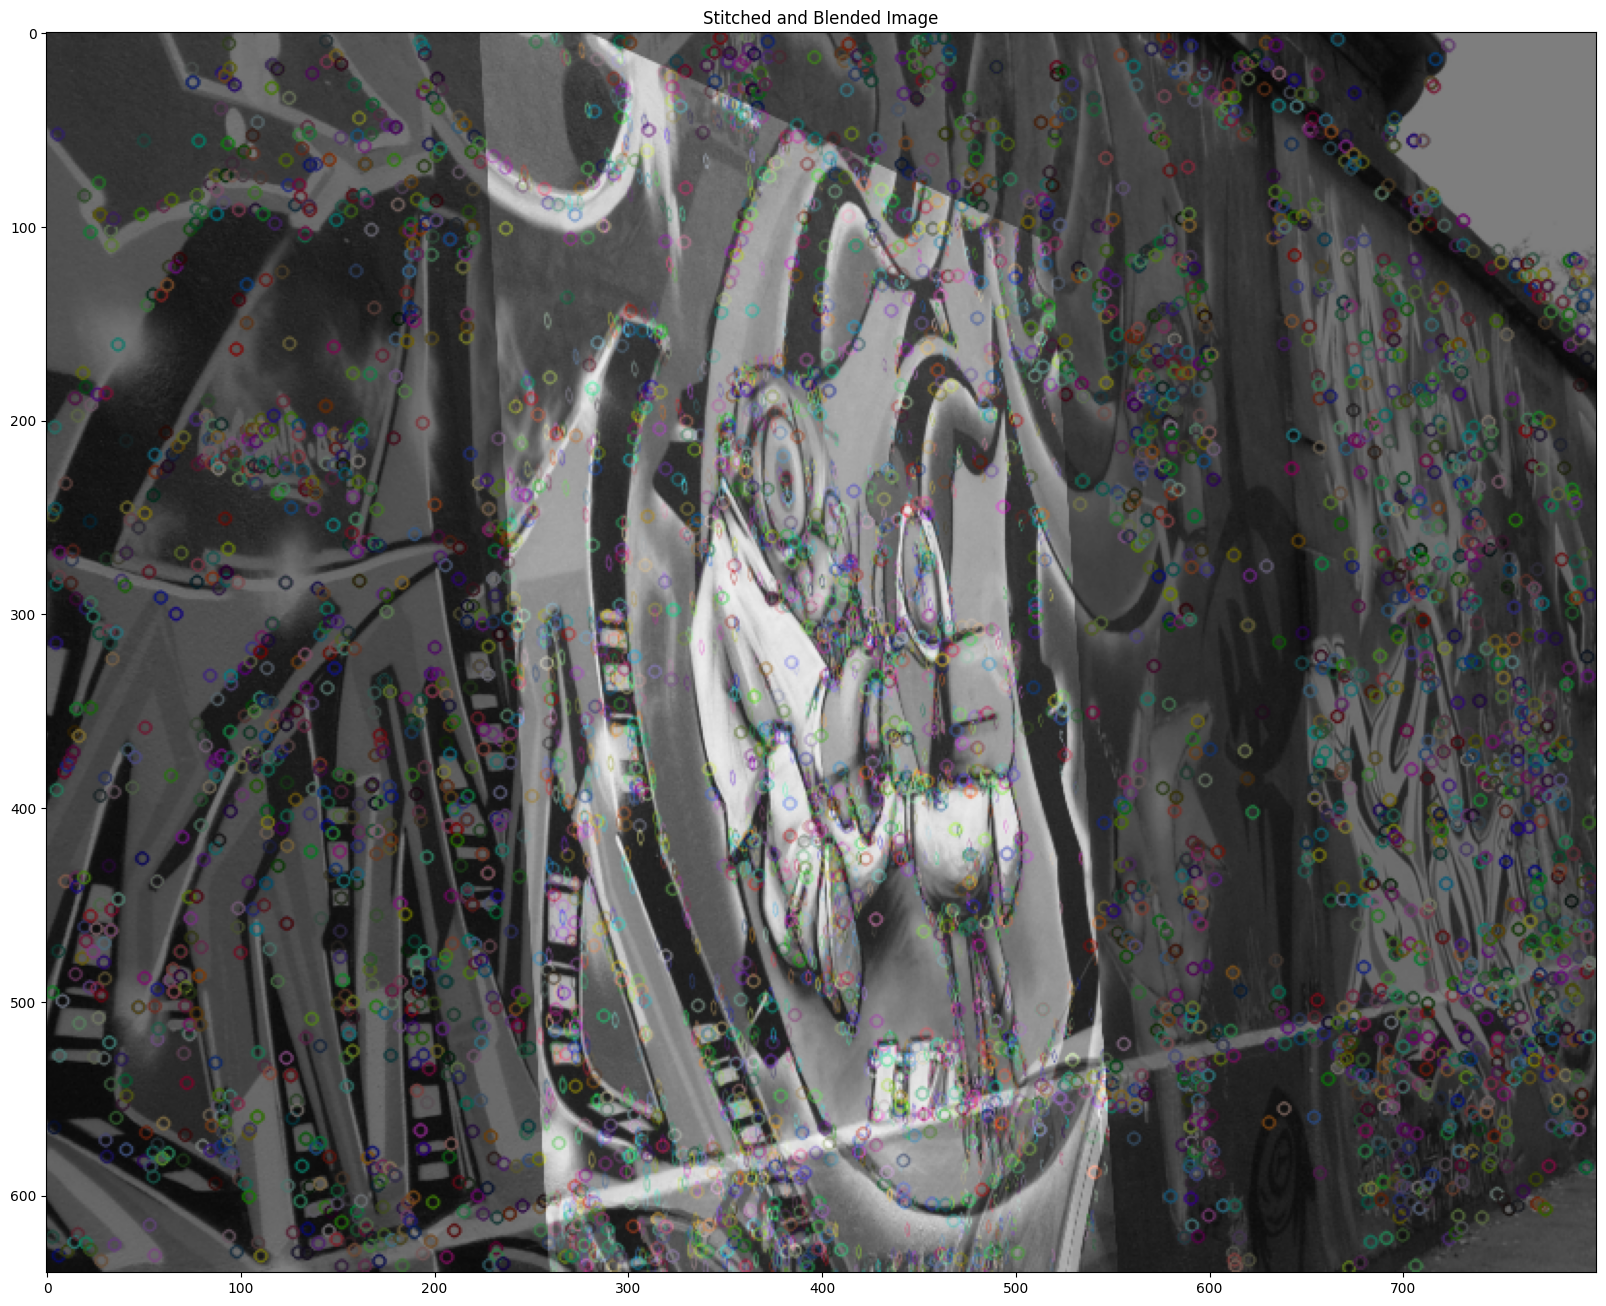

In [6]:
# Warp img1 to align it with img5
#stitched_image = cv2.warpPerspective(img1, best_homography, (img5.shape[1], img5.shape[0]))
stitched_image = cv2.warpPerspective(img1, known_homography, (img5.shape[1], img5.shape[0]))

# Blend the two images to create a seamless result
alpha = 0.5  # Adjust the alpha value for different blending effects
beta = 1.0 - alpha
blended_image = cv2.addWeighted(stitched_image, alpha, img5, beta, 0.0)

# Display or save the stitched and blended image
#cv2.imshow('Stitched and Blended Image', blended_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Plot the stitched and blended image
plt.figure(figsize=(20, 20))
plt.imshow(blended_image)
plt.title('Stitched and Blended Image')
plt.show()

# Save the result
#cv2.imwrite('stitched_image.jpg', blended_image)


## Reference

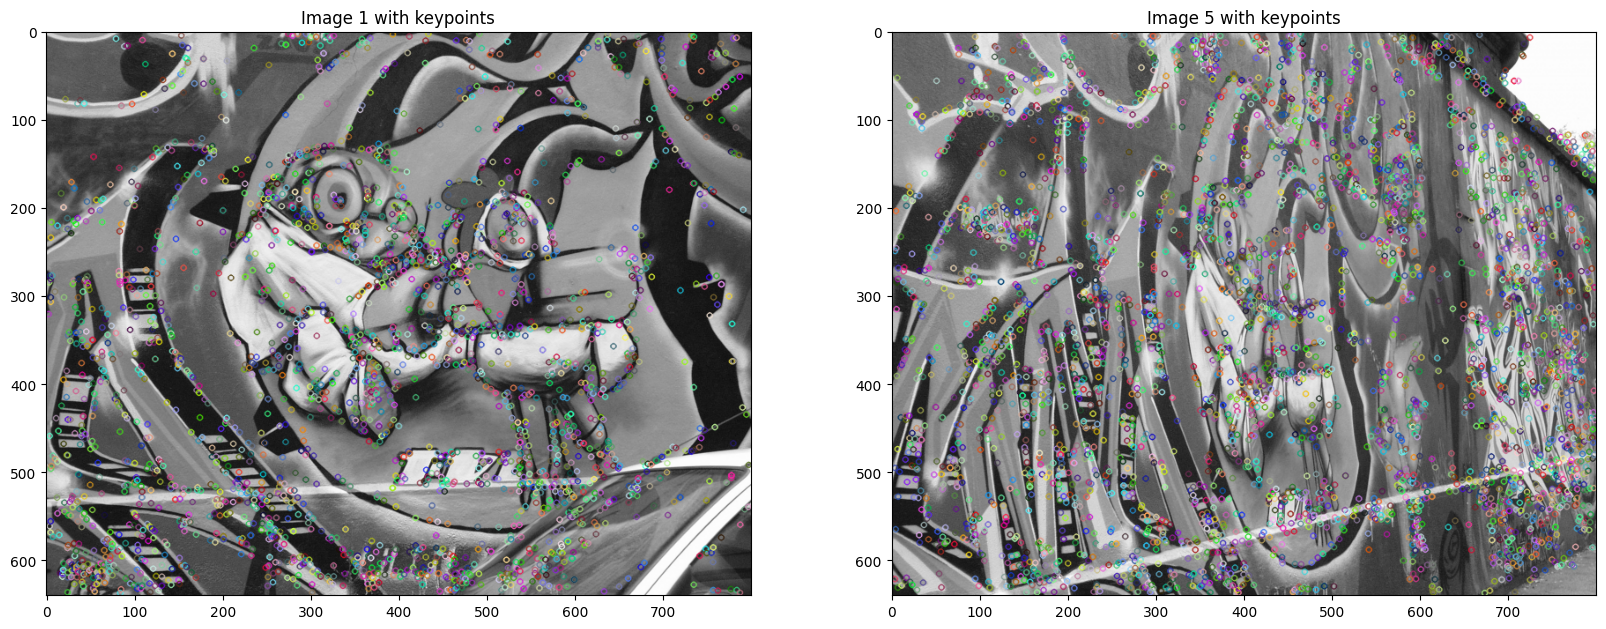

In [3]:
import cv2
import numpy as np  
import matplotlib.pyplot as plt


img1 = cv2.imread(r'W:\University of Moratuwa\Academics\Semester 5\EN3160 - Image Processing and Machine Vision\Assignments\Assignment_2\graf\img1.ppm')
img5 = cv2.imread(r'W:\University of Moratuwa\Academics\Semester 5\EN3160 - Image Processing and Machine Vision\Assignments\Assignment_2\graf\img5.ppm')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints5, descriptors5 = sift.detectAndCompute(gray5, None)

img1_with_keypoints = cv2.drawKeypoints(gray1, keypoints1, img1)
img5_with_keypoints = cv2.drawKeypoints(gray5, keypoints5, img5)

cv2.imshow('Image 1 Keypoints', img1_with_keypoints)
cv2.imshow('Image 5 Keypoints', img5_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Show Images
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img1_with_keypoints)
plt.title('Image 1 with keypoints')
plt.subplot(1, 2, 2)
plt.imshow(img5_with_keypoints)
plt.title('Image 5 with keypoints')
plt.show()



In [4]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors5, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)


In [5]:
# src_pts and dst_pts contain the corresponding SIFT keypoints that were matched. 
# The cv2.findHomography function is used with RANSAC to estimate the homography matrix.

MIN_MATCH_COUNT = 10  # Adjust this threshold as needed

if len(good_matches) >= MIN_MATCH_COUNT:
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints5[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Find the homography matrix using RANSAC
    homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
else:
    print("Not enough matches are found - {}/{}".format(len(good_matches), MIN_MATCH_COUNT))
    exit()


In [6]:
# Assuming you have the ground truth homography as 'ground_truth_homography'
# Compare the estimated homography with the ground truth
error = np.sum(np.abs(homography - ground_truth_homography))
print("Homography Estimation Error:", error)


NameError: name 'ground_truth_homography' is not defined

In [7]:
import cv2
import numpy as np

# Load the two images
image1 = cv2.imread(r'W:\University of Moratuwa\Academics\Semester 5\EN3160 - Image Processing and Machine Vision\Assignments\Assignment_2\graf\img1.ppm')
image2 = cv2.imread(r'W:\University of Moratuwa\Academics\Semester 5\EN3160 - Image Processing and Machine Vision\Assignments\Assignment_2\graf\img5.ppm')

# Detect SIFT features and compute descriptors
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Create a brute force matcher
bf = cv2.BFMatcher()

# Match the descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract the matched keypoints
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Compute the homography matrix using RANSAC
homography, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# The 'homography' matrix represents the transformation from image1 to image2
print("Homography Matrix:")
print(homography)


Homography Matrix:
[[ 3.24288397e-01 -4.96176148e-01  1.08180160e+02]
 [ 1.01091939e+00 -1.63760909e+00  3.64839355e+02]
 [ 2.79837993e-03 -4.49670554e-03  1.00000000e+00]]
